# Classification with Neural Network

## Dataset Exploration

In this tutorial, the dataset used is the Iris dataset. The Iris dataset is a multivariate dataset introduced by Ronald Fisher in 1936 through his research entitled "***The use of multiple measurements in taxonomic problems as an example of linear discriminant analysis***".
  
This dataset contains information about flower components and their species. This dataset contains 50 sample lines from each species. In total there are 3 species with 50 rows of data each. This dataset contains the following columns:

1. **sepal_length** (In centimeter units, float)
2. **sepal_width** (In centimeter units, float)
3. **petal_length** (In centimeter units, float)
4. **petal_width** (In centimeter units, float)
5. **species** (3 Classes, string)

Let's see what information we can get from this dataset!

In [ ]:
# Import library yang dibutuhkan

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from pandas.plotting import parallel_coordinates

The dataset used was taken from UCI machine learning. Make sure your laptop is connected to the internet. Then, because this dataset does not have a header, the header must be added manually

In [ ]:
#Define the col names
colnames=["sepal_length", "sepal_width","petal_length","petal_width", "species"]

#Read the dataset
dataset = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", header = None, names= colnames )

#Data
dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
dataset.groupby('species').size()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

As seen in the output from the cell above, it can be seen that the dataset has 3 classes, each with the same number. So it can be said that this dataset has no data gaps

After getting information regarding the number of species, it's time to explore further

In [ ]:
dataset.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


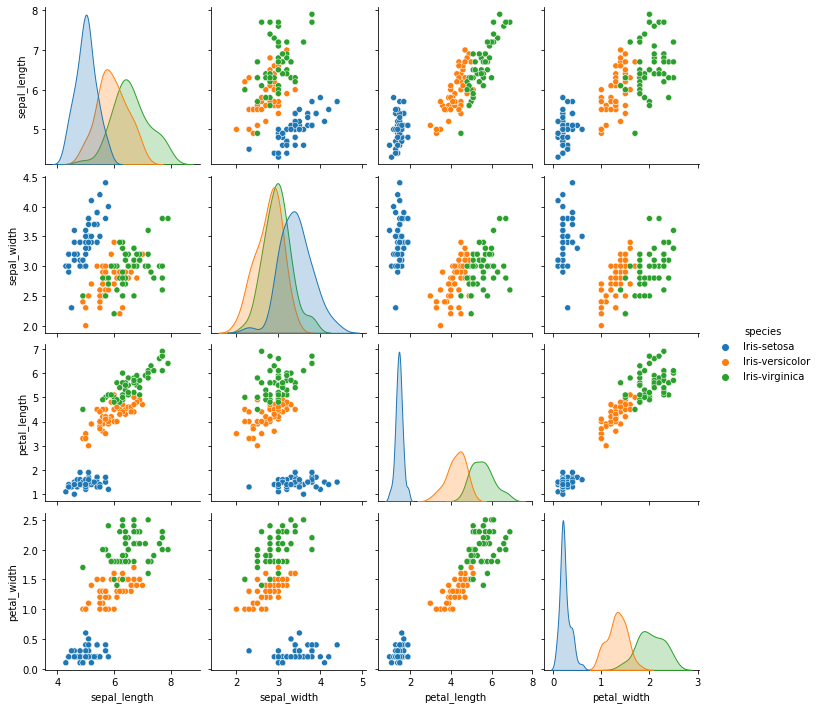

In [ ]:
# Visualisation with Pair Plotting

sns.pairplot(data=dataset, vars=('sepal_length','sepal_width','petal_length','petal_width'), hue='species')

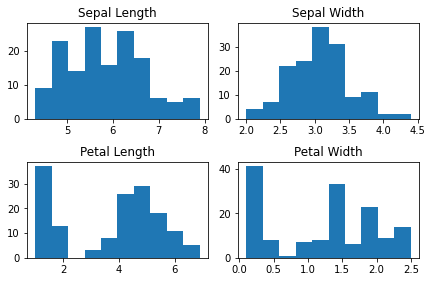

In [ ]:
# Visualisation with Bar Chart

n_bins = 10
fig, axs = plt.subplots(2, 2)
axs[0,0].hist(dataset['sepal_length'], bins = n_bins);
axs[0,0].set_title('Sepal Length');
axs[0,1].hist(dataset['sepal_width'], bins = n_bins);
axs[0,1].set_title('Sepal Width');
axs[1,0].hist(dataset['petal_length'], bins = n_bins);
axs[1,0].set_title('Petal Length');
axs[1,1].hist(dataset['petal_width'], bins = n_bins);
axs[1,1].set_title('Petal Width');

fig.tight_layout(pad=1.0);

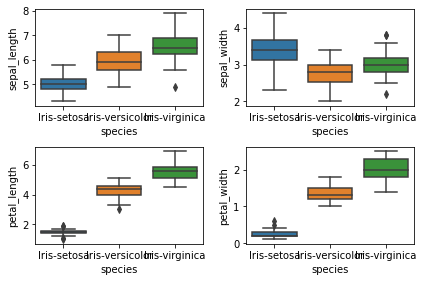

In [ ]:
# Visualisation with Boxplot

fig, axs = plt.subplots(2, 2)
fn = ["sepal_length", "sepal_width", "petal_length", "petal_width"]
cn = ["Iris-setosa", "Iris-versicolor", "Iris-virginica"]
sns.boxplot(x = 'species', y = 'sepal_length', data = dataset, order = cn, ax = axs[0,0]);
sns.boxplot(x = 'species', y = 'sepal_width', data = dataset, order = cn, ax = axs[0,1]);
sns.boxplot(x = 'species', y = 'petal_length', data = dataset, order = cn, ax = axs[1,0]);
sns.boxplot(x = 'species', y = 'petal_width', data = dataset,  order = cn, ax = axs[1,1]);

fig.tight_layout(pad=1.0);

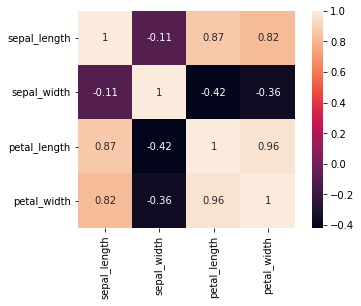

In [ ]:
# Visualisation with Heatmap
corrmat = dataset.corr()
sns.heatmap(corrmat, annot = True, square = True);

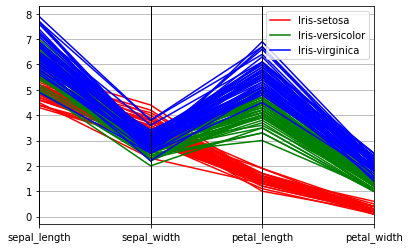

In [ ]:
# Visualisation with Parallel Coordinate
parallel_coordinates(dataset, "species", color = ['red', 'green', 'blue']);

After data exploration is complete, now is the time to create a Classifier for the Neural Network that we use for this iris dataset. Classifier formation is carried out in the next section

## Data Preprocessing

In this section, data preprocessing will be carried out on the iris dataset. Preprocessing involves:
- Dataset Normalization
- Variable Encoding
- Separation of data into X_train, X_test, y_train, and y_test

This is necessary so that the Neural Network can receive data in a format that matches the algorithm's expectations,

### Normalization using Min-max normalization

In [ ]:
from sklearn.preprocessing import MinMaxScaler

X = dataset.drop(['species'], axis=1)

scale = MinMaxScaler()
result = scale.fit_transform(X)
dataset_norm = pd.DataFrame(result)

dataset_norm.rename(columns={0: 'sepal_length', 1: 'sepal_width', 2: 'petal_length', 3: 'petal_width'}, inplace=True)

In [ ]:
# Displays the first 10 normalized sample rows
dataset_norm.head(n=10)

,sepal_length,sepal_width,petal_length,petal_width
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667
5,0.305556,0.791667,0.118644,0.125000
6,0.083333,0.583333,0.067797,0.083333
7,0.194444,0.583333,0.084746,0.041667
8,0.027778,0.375000,0.067797,0.041667
9,0.166667,0.458333,0.084746,0.000000


### Replacing the species information in the data so that what was originally a string becomes an integer.

Iris-setosa -> 1
Iris-versicolor -> 2
Iris virginica -> 3

In [ ]:
target = dataset['species']
dataset_species = target.replace(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], [1,2,3])

dataset_converted = pd.concat([dataset_norm, dataset_species], axis=1)
dataset_converted.head(n=10)


,sepal_length,sepal_width,petal_length,petal_width,species
0,0.222222,0.625000,0.067797,0.041667,1
1,0.166667,0.416667,0.067797,0.041667,1
2,0.111111,0.500000,0.050847,0.041667,1
3,0.083333,0.458333,0.084746,0.041667,1
4,0.194444,0.666667,0.067797,0.041667,1
5,0.305556,0.791667,0.118644,0.125000,1
6,0.083333,0.583333,0.067797,0.083333,1
7,0.194444,0.583333,0.084746,0.041667,1
8,0.027778,0.375000,0.067797,0.041667,1
9,0.166667,0.458333,0.084746,0.000000,1


In [ ]:
from sklearn.model_selection import train_test_split

# Form 4 variables X_train, X_test, y_train, and y_test

X = dataset_converted.iloc[:,:-1]
y = dataset_converted.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=2021)

## Classification with Neural Network

In this section we will classify the Iris dataset using a Neural Network using the MLPClassifier on Scikit-Learn. In the classification case, the main cases we will solve are:
  

**Prediction of species types on the Iris dataset**
  

Note: Neural networks require data that contains entirely numeric data, so because the dataset we use does not all contain numeric data, adjustments need to be made. **So please complete questions A.1 & A.2 first before continuing to this stage**

### Establishment of Classifiers & Training

Like the classifiers that have been studied previously (SVM, etc.), the MLPClassifier also has a configuration in the form of hyperparameters that can be customized according to needs.

Further information regarding parameters can be seen here:
https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

In [ ]:
from sklearn.neural_network import MLPClassifier

classifier = MLPClassifier(
    solver='lbfgs',
    alpha=1e-5,
    hidden_layer_sizes=(3, 3),
    random_state=2021,
    verbose=True
)

In [ ]:
classifier.fit(X_train, y_train)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(3, 3), random_state=2021,
              solver='lbfgs', verbose=True)

### Evaluation
Evaluation uses several evaluation metrics to find out how good the performance is.
  
Find out how the prediction results produced by MLPClassifier are.
The returned result is an array containing numbers in the range [1,3], where each number represents the following:

* 1 -> Iris-setosa
* 2 -> Iris-versicolor
* 3 -> Iris-virginica

Predictions use the dataframe used for testing which altogether amounts to 30% of the data

In [ ]:
print("Result of  MLPClassifier:")
prediction = classifier.predict(X_test)
print(prediction)

# Bandingkan hasil prediksi diatas dengan nilai pada variabel y_test (Data asli sejumlah 30% data)
print("\nGround Truth / Dataset")
print(y_test)

Hasil Prediksi MLPClassifier:
[1 1 2 1 1 1 1 1 1 1 1 2 3 3 2 3 2 2 1 2 2 3 3 1 2 2 2 3 1 1 2 2 1 3 2 3 3
 1 3 2 3 3 1 2 3]

Ground Truth / Dataset Test Asli
[1 1 2 1 1 1 1 1 1 1 1 2 3 3 2 3 2 2 1 2 2 3 3 1 3 2 2 2 1 1 2 2 1 3 2 2 3
 1 3 2 3 3 1 2 3]


#### Evaluation Function (Classification)
This function can be reused if you need it to answer questions or experiment.

In [ ]:
from sklearn.metrics import precision_score, \
     recall_score, classification_report, \
     accuracy_score, f1_score, ConfusionMatrixDisplay

def evaluate_classifier_performance(classifier, prediction, y_test = y_test):
     # Compact evaluation information
     print("Evaluation Results:\n\n%s\n" % (classification_report(y_test, classifier.predict(X_test))))

     # Need more complete information? please see below
     print('Accuracy:', accuracy_score(y_test, prediction))
     print('Precision Macro Average:', precision_score(y_test, prediction, average='macro'))
     print('Precision Micro Average:', precision_score(y_test, prediction, average='micro'))
     print('Recall Macro Average:', recall_score(y_test, prediction, average='macro'))
     print('Recall Micro Average:', recall_score(y_test, prediction, average='micro'))
     print('F1 Macro Average:', f1_score(y_test, prediction, average='macro'))
     print('F1 Micro Average:', f1_score(y_test, prediction, average='micro'))

     # Confusion Matrix
     print("\n\nConfusion Matrix\n")
     ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test)

Hasil Evaluasi:

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        17
           2       0.93      0.88      0.90        16
           3       0.85      0.92      0.88        12

    accuracy                           0.93        45
   macro avg       0.93      0.93      0.93        45
weighted avg       0.94      0.93      0.93        45


Accuracy: 0.9333333333333333
Precision Macro Average: 0.9264957264957264
Precision Micro Average: 0.9333333333333333
Recall Macro Average: 0.9305555555555555
Recall Micro Average: 0.9333333333333333
F1 Macro Average: 0.927741935483871
F1 Micro Average: 0.9333333333333333


Confusion Matrix



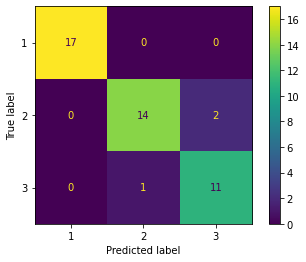

In [ ]:
# Calls the evaluation function for the MLP Classifier
evaluate_classifier_performance(classifier, prediction)

The evaluation results obtained were very good. The results obtained were 93% accurate. Eits, but wait a minute, these results can change depending on how you configure the hyperparameters (or what is familiarly called *Hyperparameter tuning*)

### Hyperparameter MLPClassifier

Performing hyperparameter tuning on MLPClassifier with the following specifications:
* Solver: SGD (Stochastic Gradient Descent)
* Activation Function: ReLU
* Easy Stopping: True
* Learning Rate: Invscaling
* Learning Rate Init: 1e-5

Alpha, Hidden Layer Sizes, Random State, and Verbose are the same as the first example

Then run it to the evaluation stage. What results did you get?

In [ ]:

from sklearn.neural_network import MLPClassifier

classifier = MLPClassifier(
    solver='sgd',
    activation='relu',
    early_stopping=True,
    learning_rate='invscaling',
    learning_rate_init=1e-5,
    alpha=1e-5,
    hidden_layer_sizes=(3, 3),
    random_state=2021,
    verbose=True
)

In [ ]:
classifier.fit(X_train, y_train)

Iteration 1, loss = 1.25653171
Validation score: 0.181818
Iteration 2, loss = 1.25652482
Validation score: 0.181818
Iteration 3, loss = 1.25652118
Validation score: 0.181818
Iteration 4, loss = 1.25651773
Validation score: 0.181818
Iteration 5, loss = 1.25651446
Validation score: 0.181818
Iteration 6, loss = 1.25651135
Validation score: 0.181818
Iteration 7, loss = 1.25650841
Validation score: 0.181818
Iteration 8, loss = 1.25650562
Validation score: 0.181818
Iteration 9, loss = 1.25650298
Validation score: 0.181818
Iteration 10, loss = 1.25650047
Validation score: 0.181818
Iteration 11, loss = 1.25649810
Validation score: 0.181818
Iteration 12, loss = 1.25649586
Validation score: 0.181818
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  "X does not have valid featu

MLPClassifier(alpha=1e-05, early_stopping=True, hidden_layer_sizes=(3, 3),
              learning_rate='invscaling', learning_rate_init=1e-05,
              random_state=2021, solver='sgd', verbose=True)

In [ ]:
print("MLPClassifier Prediction Results:")
prediction = classifier.predict(X_test)
print(prediction)

# Compare the prediction results above with the value of the y_test variable (original data is 30% of the data)
print("\nGround Truth / Original Test Dataset")
print(y_test)

Hasil Prediksi MLPClassifier:
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2]

Ground Truth / Dataset Test Asli
[1 1 2 1 1 1 1 1 1 1 1 2 3 3 2 3 2 2 1 2 2 3 3 1 3 2 2 2 1 1 2 2 1 3 2 2 3
 1 3 2 3 3 1 2 3]


In [ ]:
from sklearn.metrics import precision_score, \
     recall_score, classification_report, \
     accuracy_score, f1_score, ConfusionMatrixDisplay

def evaluate_classifier_performance(classifier, prediction, y_test = y_test):
     # Compact evaluation information
     print("Evaluation Results:\n\n%s\n" % (classification_report(y_test, classifier.predict(X_test))))

     # Need more complete information? please see below
     print('Accuracy:', accuracy_score(y_test, prediction))
     print('Precision Macro Average:', precision_score(y_test, prediction, average='macro'))
     print('Precision Micro Average:', precision_score(y_test, prediction, average='micro'))
     print('Recall Macro Average:', recall_score(y_test, prediction, average='macro'))
     print('Recall Micro Average:', recall_score(y_test, prediction, average='micro'))
     print('F1 Macro Average:', f1_score(y_test, prediction, average='macro'))
     print('F1 Micro Average:', f1_score(y_test, prediction, average='micro'))

     # Confusion Matrix
     print("\n\nConfusion Matrix\n")
     ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test)

Hasil Evaluasi:

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        17
           2       0.36      1.00      0.52        16
           3       0.00      0.00      0.00        12

    accuracy                           0.36        45
   macro avg       0.12      0.33      0.17        45
weighted avg       0.13      0.36      0.19        45


Accuracy: 0.35555555555555557
Precision Macro Average: 0.11851851851851852
Precision Micro Average: 0.35555555555555557
Recall Macro Average: 0.3333333333333333
Recall Micro Average: 0.35555555555555557
F1 Macro Average: 0.17486338797814208
F1 Micro Average: 0.35555555555555557


Confusion Matrix



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

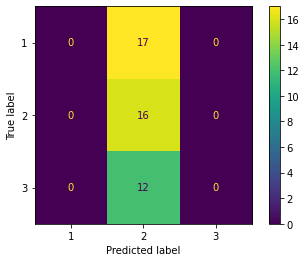

In [ ]:
# Calls the evaluation function for the MLP Classifier
evaluate_classifier_performance(classifier, prediction)

These results show differences in accuracy, where the SGD model produces smaller accuracy values than LBFGS.

It can also be seen that the value of the F1 Score in classes 1 and 3 is 0, which indicates that the model is not adequate in predicting this class.

Results with LBFGS show that this data handling is suitable for small amounts of data.

### Same problem. With the solver: Adam
  
Alpha, Hidden Layer Sizes, Random State, and Verbose are the same as the first example

Then run it to the evaluation stage. What results did you get?

In [ ]:
from sklearn.neural_network import MLPClassifier

classifier = MLPClassifier(
    solver='adam',
    alpha=1e-5,
    hidden_layer_sizes=(3, 3),
    random_state=2021,
    verbose=True
)

In [ ]:
classifier.fit(X_train, y_train)

Iteration 1, loss = 1.29852813
Iteration 2, loss = 1.29600600
Iteration 3, loss = 1.29350588
Iteration 4, loss = 1.29103061
Iteration 5, loss = 1.28857369
Iteration 6, loss = 1.28612400
Iteration 7, loss = 1.28368932
Iteration 8, loss = 1.28126962
Iteration 9, loss = 1.27887126
Iteration 10, loss = 1.27648569
Iteration 11, loss = 1.27410318
Iteration 12, loss = 1.27173318
Iteration 13, loss = 1.26937881
Iteration 14, loss = 1.26704298
Iteration 15, loss = 1.26471969
Iteration 16, loss = 1.26242172
Iteration 17, loss = 1.26015194
Iteration 18, loss = 1.25789859
Iteration 19, loss = 1.25566363
Iteration 20, loss = 1.25345119
Iteration 21, loss = 1.25126378
Iteration 22, loss = 1.24908299
Iteration 23, loss = 1.24691675
Iteration 24, loss = 1.24476786
Iteration 25, loss = 1.24263353
Iteration 26, loss = 1.24052283
Iteration 27, loss = 1.23843302
Iteration 28, loss = 1.23635989
Iteration 29, loss = 1.23430833
Iteration 30, loss = 1.23227623
Iteration 31, loss = 1.23026298
Iteration 32, los

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


MLPClassifier(alpha=1e-05, hidden_layer_sizes=(3, 3), random_state=2021,
              verbose=True)

In [ ]:
print("MLPClassifier Prediction Results:")
prediction = classifier.predict(X_test)
print(prediction)

# Compare the prediction results above with the value of the y_test variable (original data is 30% of the data)
print("\nGround Truth / Original Test Dataset")
print(y_test)

Hasil Prediksi MLPClassifier:
[2 2 3 2 2 2 2 2 2 2 2 2 3 3 2 2 2 2 2 2 2 3 2 2 2 2 2 3 2 2 2 2 2 3 2 3 3
 2 3 2 3 3 2 2 2]

Ground Truth / Dataset Test Asli
[1 1 2 1 1 1 1 1 1 1 1 2 3 3 2 3 2 2 1 2 2 3 3 1 3 2 2 2 1 1 2 2 1 3 2 2 3
 1 3 2 3 3 1 2 3]


In [ ]:
from sklearn.metrics import precision_score, \
     recall_score, classification_report, \
     accuracy_score, f1_score, ConfusionMatrixDisplay

def evaluate_classifier_performance(classifier, prediction, y_test = y_test):
     # Compact evaluation information
     print("Evaluation Results:\n\n%s\n" % (classification_report(y_test, classifier.predict(X_test))))

     # Need more complete information? please see below
     print('Accuracy:', accuracy_score(y_test, prediction))
     print('Precision Macro Average:', precision_score(y_test, prediction, average='macro'))
     print('Precision Micro Average:', precision_score(y_test, prediction, average='micro'))
     print('Recall Macro Average:', recall_score(y_test, prediction, average='macro'))
     print('Recall Micro Average:', recall_score(y_test, prediction, average='micro'))
     print('F1 Macro Average:', f1_score(y_test, prediction, average='macro'))
     print('F1 Micro Average:', f1_score(y_test, prediction, average='micro'))

     # Confusion Matrix
     print("\n\nConfusion Matrix\n")
     ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test)

Hasil Evaluasi:

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        17
           2       0.38      0.81      0.52        16
           3       0.73      0.67      0.70        12

    accuracy                           0.47        45
   macro avg       0.37      0.49      0.41        45
weighted avg       0.33      0.47      0.37        45


Accuracy: 0.4666666666666667
Precision Macro Average: 0.3698752228163993
Precision Micro Average: 0.4666666666666667
Recall Macro Average: 0.4930555555555555
Recall Micro Average: 0.4666666666666667


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

F1 Macro Average: 0.4052173913043478
F1 Micro Average: 0.4666666666666667


Confusion Matrix



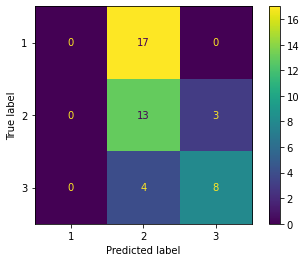

In [ ]:
# Calls the evaluation function for the MLP Classifier
evaluate_classifier_performance(classifier, prediction)

It can be seen that there is a difference in accuracy. The model with Adam gets a smaller accuracy value than LBFGS, but the Adam model gets a better accuracy value than SGD. This indicates that the Adam model is more adequate than SGD.

### Evaluation with other Classifier
Let's see how the Neural Network performs when compared to other classifiers

#### Decision Tree (Gini & Entropy)
The following are the results of evaluating the classification of the Iris dataset when using Decision Tree. This time using Gini & Entropy variations for Decision Trees.

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

classifier_dt_gini = DecisionTreeClassifier(max_depth = 10, random_state = 2021, criterion='gini')
classifier_dt_gini.fit(X_train, y_train)
prediction_dt_gini = classifier_dt_gini.predict(X_test)

classifier_dt_entropy = DecisionTreeClassifier(max_depth = 10, random_state = 2021, criterion='entropy')
classifier_dt_entropy.fit(X_train, y_train)
prediction_dt_entropy = classifier_dt_entropy.predict(X_test)

Hasil Evaluasi:

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        17
           2       0.84      1.00      0.91        16
           3       1.00      0.75      0.86        12

    accuracy                           0.93        45
   macro avg       0.95      0.92      0.92        45
weighted avg       0.94      0.93      0.93        45


Accuracy: 0.8888888888888888
Precision Macro Average: 0.8805704099821746
Precision Micro Average: 0.8888888888888888
Recall Macro Average: 0.875
Recall Micro Average: 0.8888888888888888
F1 Macro Average: 0.8770311813790075
F1 Micro Average: 0.8888888888888888


Confusion Matrix



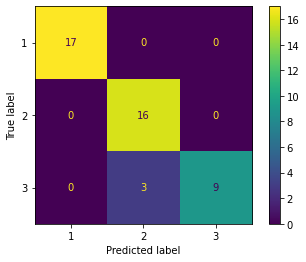

In [ ]:
# Evaluasi Varian Gini
evaluate_classifier_performance(classifier_dt_gini, prediction_dt_entropy)

Hasil Evaluasi:

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        17
           2       0.82      0.88      0.85        16
           3       0.82      0.75      0.78        12

    accuracy                           0.89        45
   macro avg       0.88      0.88      0.88        45
weighted avg       0.89      0.89      0.89        45


Accuracy: 0.9333333333333333
Precision Macro Average: 0.9473684210526315
Precision Micro Average: 0.9333333333333333
Recall Macro Average: 0.9166666666666666
Recall Micro Average: 0.9333333333333333
F1 Macro Average: 0.9238095238095237
F1 Micro Average: 0.9333333333333333


Confusion Matrix



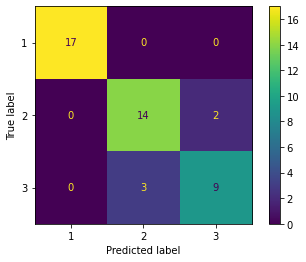

In [ ]:
# Evaluasi Varian Entropy
evaluate_classifier_performance(classifier_dt_entropy, prediction_dt_gini)

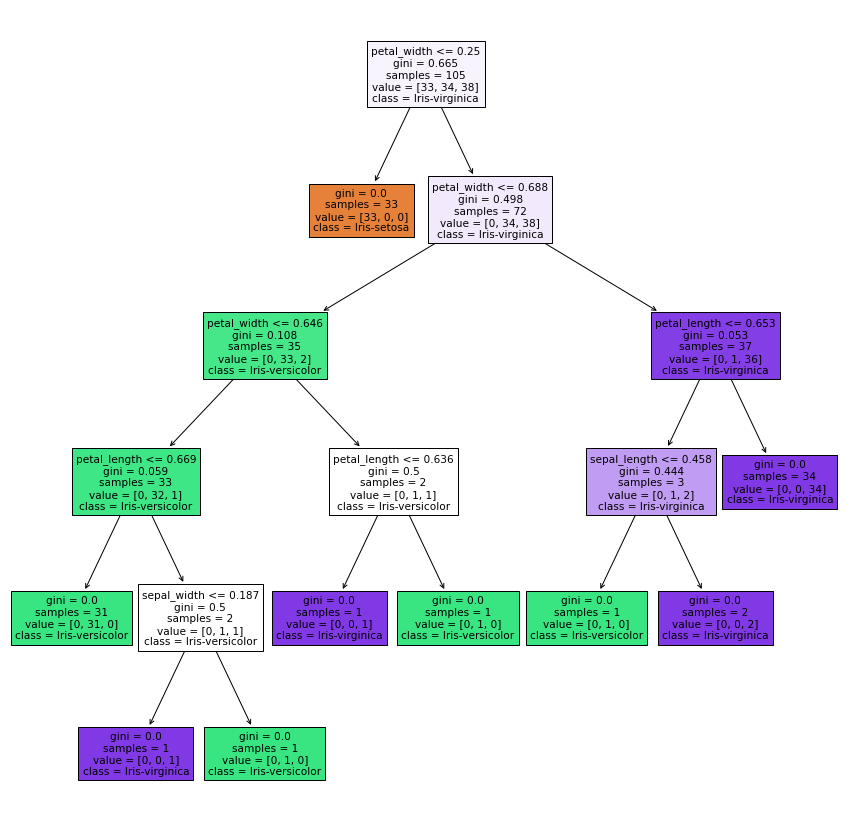

In [ ]:
# Decision Tree (Varian Gini)
plt.figure(figsize = (15,15))
plot_tree(classifier_dt_gini, feature_names = fn, class_names = cn, filled = True);

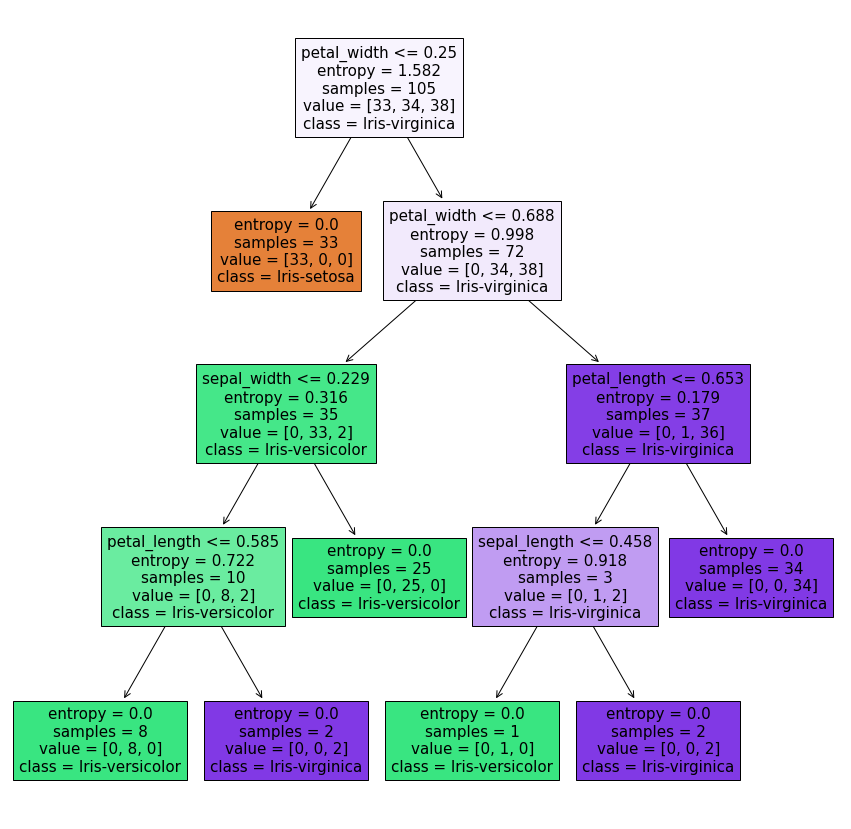

In [ ]:
# Decision Tree (Varian Entropy)
plt.figure(figsize = (15,15))
plot_tree(classifier_dt_entropy, feature_names = fn, class_names = cn, filled = True);

#### KNN
The following are the results of evaluating the classification of the Iris dataset when using KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

Hasil Evaluasi:

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        17
           2       0.94      1.00      0.97        16
           3       1.00      0.92      0.96        12

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.98        45
weighted avg       0.98      0.98      0.98        45


Accuracy: 0.9777777777777777
Precision Macro Average: 0.9803921568627452
Precision Micro Average: 0.9777777777777777
Recall Macro Average: 0.9722222222222222
Recall Micro Average: 0.9777777777777777
F1 Macro Average: 0.9754062362758015
F1 Micro Average: 0.9777777777777777


Confusion Matrix



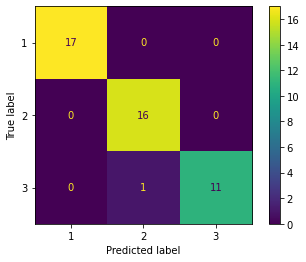

In [ ]:
evaluate_classifier_performance(knn, knn_pred)

Hasil Evaluasi:

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        17
           2       0.89      1.00      0.94        16
           3       1.00      0.83      0.91        12

    accuracy                           0.96        45
   macro avg       0.96      0.94      0.95        45
weighted avg       0.96      0.96      0.95        45


Accuracy: 0.9555555555555556
Precision Macro Average: 0.9629629629629629
Precision Micro Average: 0.9555555555555556
Recall Macro Average: 0.9444444444444445
Recall Micro Average: 0.9555555555555556
F1 Macro Average: 0.9500891265597148
F1 Micro Average: 0.9555555555555556


Confusion Matrix



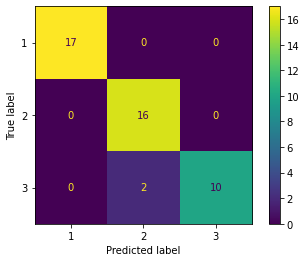

In [ ]:
evaluate_classifier_performance(bayes, bayes_pred)

#### Naive Bayes
The following are the results of evaluating the classification of the Iris dataset when using Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
bayes = GaussianNB()
bayes.fit(X_train, y_train)
bayes_pred = bayes.predict(X_test)

Hasil Evaluasi:

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        17
           2       0.89      1.00      0.94        16
           3       1.00      0.83      0.91        12

    accuracy                           0.96        45
   macro avg       0.96      0.94      0.95        45
weighted avg       0.96      0.96      0.95        45


Accuracy: 0.9555555555555556
Precision Macro Average: 0.9629629629629629
Precision Micro Average: 0.9555555555555556
Recall Macro Average: 0.9444444444444445
Recall Micro Average: 0.9555555555555556
F1 Macro Average: 0.9500891265597148
F1 Micro Average: 0.9555555555555556


Confusion Matrix



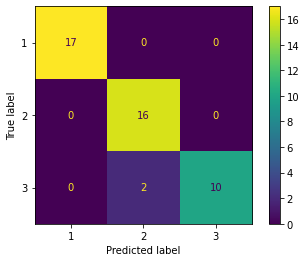

In [ ]:
evaluate_classifier_performance(bayes, bayes_pred)

#### SVM
The following are the results of evaluating the classification of the Iris dataset when using SVM

In [ ]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)

Hasil Evaluasi:

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        17
           2       0.89      1.00      0.94        16
           3       1.00      0.83      0.91        12

    accuracy                           0.96        45
   macro avg       0.96      0.94      0.95        45
weighted avg       0.96      0.96      0.95        45


Accuracy: 0.9555555555555556
Precision Macro Average: 0.9629629629629629
Precision Micro Average: 0.9555555555555556
Recall Macro Average: 0.9444444444444445
Recall Micro Average: 0.9555555555555556
F1 Macro Average: 0.9500891265597148
F1 Micro Average: 0.9555555555555556


Confusion Matrix



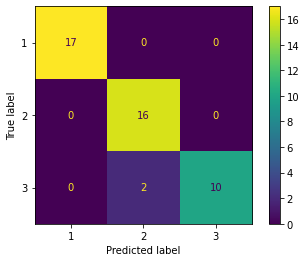

In [ ]:
evaluate_classifier_performance(svm, svm_pred)

# Performing Neural Network in Classification case

### Dataset Explanation

The dataset used is the dataset on changes in body weight, calories and exercise patterns in 2018

Attribute description:
* **date** : Date of observation.
* **stone, pounds, ounces** : measured weight
* **weight_oz** : Total weight in ounces
* **calories** : Approximate calories consumed on that date
* **calsperoz** : calories per ounce - calories for that day divided by weight in ounces
* **five_donuts** : day where main meal was bag of five jam donuts, 1 = TRUE, 0 = FALSE
* **walk** : day included at least one brisk walk of over 20 minutes, 1 = TRUE, 0 = FALSE
* **run**: day included at one short run of 2.5 miles, 1 = TRUE, 0 = FALSE
* **wine** : day finished with at least one large glass of wine when not accompanied by other fluids, 1 = TRUE, 0 = FALSE
* **prot** : day involved what would be considered a high protein diet, 1 = TRUE, 0 = FALSE
* **weight** : signifies day during period of weight-based exercise; includes rest days as part of period, 1 = TRUE, 0 = FALSE
* **change** : change in weight in oz

In [ ]:
# Import Dataset
!wget -q --no-check-certificate 'https://docs.google.com/uc?export=download&id=1KChrqfvQEiQmEPu1171eEbG7LOtrxbA6' -O diet_data.csv

### Predict 'change' column using MLPClassifier
Using the given dataset (**diet_data.csv**) Please perform classification modeling using **MLPClassifier** to predict the **change** column.
  
Because the change column is still numeric, please change it first following the following conditions:
* If change is negative (eg -30.0), then change it to the number **2**
* If the change is positive (eg 8.0), then change it to the number **1**
* If change is zero (0.0), then change it to the number **0**
* Train: Test data has a ratio of 70: 30
* Random state: 2021

Answers should include:
1. EDA (Exploratory Data Analysis)
2. Data Preprocessing
3. Formation of a classifier with MLPClassifier
4. Evaluation using MLPClassifier (at least includes Accuracy, Precision, Recall, and F1)
5. Evaluation and comparison using other classifiers (Minimum 3 classifiers)

EDA

In [ ]:
dataset_diet = pd.read_csv("diet_data.csv")
dataset_diet.head(n=10)

,date,stone,pounds,ounces,weight_oz,calories,cals_per_oz,five_donuts,walk,run,wine,prot,weight,change
0,7/30/2018,12.0,2.0,6.0,2726.0,1950.0,0.72,1.0,1.0,0.0,0.0,0.0,0.0,-30.0
1,7/31/2018,12.0,0.0,8.0,2696.0,2600.0,0.96,1.0,0.0,0.0,0.0,0.0,0.0,8.0
2,8/1/2018,12.0,1.0,0.0,2704.0,2500.0,0.92,1.0,1.0,0.0,0.0,0.0,0.0,0.0
3,8/2/2018,12.0,1.0,0.0,2704.0,1850.0,0.68,1.0,1.0,0.0,1.0,0.0,0.0,-40.0
4,8/3/2018,11.0,12.0,8.0,2664.0,2900.0,1.09,1.0,1.0,0.0,0.0,0.0,0.0,14.0
5,8/4/2018,11.0,13.0,6.0,2678.0,3600.0,1.34,0.0,0.0,0.0,0.0,0.0,0.0,14.0
6,8/5/2018,12.0,0.0,4.0,2692.0,2400.0,0.89,0.0,0.0,0.0,0.0,0.0,0.0,-2.0
7,8/6/2018,12.0,0.0,2.0,2690.0,3100.0,1.15,1.0,1.0,0.0,0.0,0.0,0.0,6.0
8,8/7/2018,12.0,0.0,8.0,2696.0,2200.0,0.82,1.0,1.0,0.0,0.0,0.0,0.0,-8.0
9,8/8/2018,12.0,0.0,0.0,2688.0,1800.0,0.67,1.0,1.0,0.0,0.0,0.0,0.0,-40.0


In [ ]:
dataset_diet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         150 non-null    object 
 1   stone        142 non-null    float64
 2   pounds       142 non-null    float64
 3   ounces       142 non-null    float64
 4   weight_oz    149 non-null    float64
 5   calories     140 non-null    float64
 6   cals_per_oz  147 non-null    object 
 7   five_donuts  140 non-null    float64
 8   walk         140 non-null    float64
 9   run          140 non-null    float64
 10  wine         140 non-null    float64
 11  prot         140 non-null    float64
 12  weight       140 non-null    float64
 13  change       147 non-null    float64
dtypes: float64(12), object(2)
memory usage: 16.6+ KB


In [ ]:
dataset_diet.describe()

,stone,pounds,ounces,weight_oz,calories,five_donuts,walk,run,wine,prot,weight,change
count,142.000000,142.000000,142.000000,149.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,147.000000
mean,11.535211,6.218310,3.577465,2560.724832,3180.714286,0.371429,0.678571,0.250000,0.307143,0.178571,0.442857,-19.088435
std,0.500524,5.655746,2.915656,571.190848,1478.753433,0.484922,0.468702,0.434568,0.462966,0.384368,0.498508,215.557796
min,11.000000,0.000000,0.000000,0.000000,1400.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2598.000000
25%,11.000000,1.000000,0.000000,2662.000000,2187.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-18.000000
50%,12.000000,3.500000,4.000000,2688.000000,2575.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-2.000000
75%,12.000000,12.000000,6.000000,2704.000000,3850.000000,1.000000,1.000000,0.250000,1.000000,0.000000,1.000000,14.000000
max,12.000000,13.000000,8.000000,2768.000000,9150.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,102.000000


In [ ]:
# Missing values
dataset_diet.isna().sum()

date            1
stone           9
pounds          9
ounces          9
weight_oz       2
calories       11
cals_per_oz     4
five_donuts    11
walk           11
run            11
wine           11
prot           11
weight         11
change          4
dtype: int64

In [ ]:
# Penanganan Missing values
dataset_diet.dropna(inplace=True)
dataset_diet

,date,stone,pounds,ounces,weight_oz,calories,cals_per_oz,five_donuts,walk,run,wine,prot,weight,change
0,7/30/2018,12.0,2.0,6.0,2726.0,1950.0,0.72,1.0,1.0,0.0,0.0,0.0,0.0,-30.0
1,7/31/2018,12.0,0.0,8.0,2696.0,2600.0,0.96,1.0,0.0,0.0,0.0,0.0,0.0,8.0
2,8/1/2018,12.0,1.0,0.0,2704.0,2500.0,0.92,1.0,1.0,0.0,0.0,0.0,0.0,0.0
3,8/2/2018,12.0,1.0,0.0,2704.0,1850.0,0.68,1.0,1.0,0.0,1.0,0.0,0.0,-40.0
4,8/3/2018,11.0,12.0,8.0,2664.0,2900.0,1.09,1.0,1.0,0.0,0.0,0.0,0.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,12/15/2018,11.0,11.0,0.0,2640.0,5750.0,2.18,0.0,0.0,0.0,0.0,0.0,0.0,16.0
139,12/16/2018,11.0,12.0,0.0,2656.0,2950.0,1.11,0.0,1.0,1.0,0.0,0.0,0.0,0.0
140,12/17/2018,11.0,12.0,0.0,2656.0,1950.0,0.73,1.0,1.0,0.0,0.0,0.0,0.0,-24.0
141,12/18/2018,11.0,10.0,8.0,2632.0,1900.0,0.72,0.0,1.0,0.0,0.0,0.0,0.0,-4.0


In [ ]:
# Duplikasi Data
print("Jumlah Duplikasi data: ", dataset_diet.duplicated(keep=False).sum())

Jumlah Duplikasi data:  0


In [ ]:
# Mapping nilai change
dataset_diet.change = dataset_diet.change.apply(lambda x: 1 if x > 0 else (2 if x < 0 else 0) )
dataset_diet.change.value_counts()

2    77
1    56
0     7
Name: change, dtype: int64

In [ ]:
# Mengubah tipe data cals_per_oz
dataset_diet['cals_per_oz'] = dataset_diet['cals_per_oz'].astype(float)

Normalisasi

In [ ]:
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold, train_test_split, cross_validate

X = dataset_diet.drop(["change", "date"], axis = 1)
y = dataset_diet["change"]
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.7, random_state=2021, stratify=y)


In [ ]:
from sklearn.preprocessing import MinMaxScaler, normalize

X_train = MinMaxScaler().fit(X_train).transform(X_train)
X_val = MinMaxScaler().fit(X_train).transform(X_val)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Classifier

MLPC

In [ ]:
classifier = MLPClassifier(
    solver='lbfgs',
    alpha=1e-5,
    hidden_layer_sizes=(3,5),
    random_state=2001,
    verbose=True,
)

In [ ]:
classifier.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(alpha=1e-05, hidden_layer_sizes=(3, 5), random_state=2001,
              solver='lbfgs', verbose=True)

In [ ]:
print("Hasil Prediksi MLPClassifier:")
prediction = classifier.predict(X_test)
print(prediction)

# Bandingkan hasil prediksi diatas dengan nilai pada variabel y_test (Data asli sejumlah 30% data)
print("\nGround Truth / Dataset Test Asli")
print(y_test)

Hasil Prediksi MLPClassifier:


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


ValueError: ignored

In [ ]:
# Memanggil fungsi evaluasi untuk MLP Classifier
evaluate_classifier_performance(classifier_B, prediction)

KNN

1. If the value of the variable o is greater than t, then the weight value after the update does not exceed the value before the update. This is because the o variable has a value greater than the value of the t variable. This indicates that the results obtained for delta w have a negative value, which is caused by the output value being greater than initial expectations. The weight value can now be determined by subtracting delta w, so that if the value of the variable o is greater than t, then the value after the update does not exceed before the update.

2. MLP is better than other classifiers because when handling large amounts of data, MLP can be used. Apart from that, MLP can also help handle non-linear data, so MLP is a good method to use.